XGBRegressor(verbosity=0)
Training score:  0.6632668927904762
Mean cross-validation score: -0.18
K-fold CV average score: -0.33
MSE: 46763.57
RMSE: 216.25
MAPE: 7.78


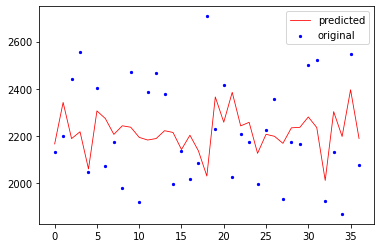

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import numpy as np
 
df = pd.read_excel('/content/FinalDF.xlsx')

# Create a quick overview of the dataset
df.drop(['Date','Summary','Unnamed: 0','Open',	'High',	'Low','Close','Volume'], axis = 1, inplace = True) 

data = df.values
x, y = data[:, :-1], data[:, -1]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)

def mean_absolute_percentage_error(ytest, ypred): 
    y_true, y_pred = np.array(ytest), np.array(ypred)
    return np.mean(np.abs((ytest - ypred) / ytest)) * 100


print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAPE: %.2f" % mean_absolute_percentage_error(ytest,ypred))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error as mae

#calculate MAE
mae(ytest, ypred)



174.34504004117397